In [1]:
import numpy as np
import pandas as pd
import os
from tinkoff.invest import CandleInterval
import tink_port as tink

import matplotlib.pyplot as plt

pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)

/home/samsmu/anaconda3/envs/t/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/samsmu/anaconda3/envs/t/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
TOKEN0 = 't.UFRJ8SC9hafVOhFxEUY7yf1wZ1gGhwJp-WCp9o4rnEChHWns0c3jQ21eQwoOW_RurFqeZpss2scJkmMQnomJ9g'
TOKEN1 = 't.6nHltT1dYSfrVTIV9zF72fxDlB2sXJbRD6iJNpZXTFAN61rmD7m71xPp9ko12ta1JxA06em4YdN36xicnBmjWg'

token = TOKEN0

In [3]:
base = tink.get_id_base(token)
port = tink.get_portfolio(token)
df_port = tink.port_to_df(port, base)

In [4]:
index_assets = ['AQUA', 'BANE', 'BANEP', 'CHMF', 'CIAN', 'FIVE', 'LKOH', 'MAGN', 'NLMK', 'POSI', 'ROSN', 'SBER',
                'SIBN', 'SMLT', 'SNGSP',  'TATN', 'TRNFP', 'OZON', 'WUSH', 'RTKM',  'MAGN', 'NVTK', 'YNDX']

### PyBroker format

In [5]:
def get_ohlc(candles):
    res = []
    for row in candles:
        sdate = row[0]
        sdate = sdate.strftime("%Y-%m-%d")
        res.append([sdate] + row[1:5]) 
    df = pd.DataFrame(res, columns = ['date', 'open', 'high', 'low', 'close'])
    
    return df

In [6]:
dfx = base[base["type"] == "shares"]
dfx = dfx[dfx["cur"] == "rub"]
df_tink = dfx

In [7]:
res = []
for ind, row in df_tink.iterrows():
    pos = row 
#    print(pos.figi)        
    candles = tink.get_candles(token, pos.figi, CandleInterval.CANDLE_INTERVAL_DAY, 60)
    df =  get_ohlc(candles)
    ticker = tink.figi_to_ticker(pos.figi, base)
    if ticker == None:
        ticker = pos.figi
    df['symbol'] = ticker
    res.append(df)

df_pybr = pd.concat(res, axis = 0)

In [8]:
import os 
full_fn = os.path.join(tink.TINK_DATA, "prices.csv")
df_pybr.to_csv(full_fn, index = False)

In [9]:
import pandas as pd
import pybroker
from pybroker.data import DataSource

class CSVDataSource(DataSource):

    def __init__(self):
        super().__init__()
        # Register custom columns in the CSV.
        pybroker.register_columns('rsi')

    def _fetch_data(self, symbols, start_date, end_date, _timeframe, _adjust):
        full_fn = os.path.join(tink.TINK_DATA, "prices.csv")
        df = pd.read_csv(full_fn)
        df = df[df['symbol'].isin(symbols)]
        df['date'] = pd.to_datetime(df['date'])
        return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [10]:
csv_data_source = CSVDataSource()
df = csv_data_source.query(['SBER'], '6/1/2023', '4/2/2024')
df

Loading bar data...
Loaded bar data: 0:00:00 



,date,open,high,low,close,symbol
0,2024-02-02,277.00,277.30,276.00,276.74,SBER
1,2024-02-05,277.00,278.57,276.90,277.84,SBER
2,2024-02-06,278.00,278.99,277.30,278.67,SBER
3,2024-02-07,278.82,284.50,278.81,284.41,SBER
4,2024-02-08,284.52,286.24,281.25,282.17,SBER
5,2024-02-09,282.17,284.00,281.50,283.50,SBER
6,2024-02-12,283.66,287.84,283.50,287.28,SBER
7,2024-02-13,287.52,289.00,285.40,287.07,SBER
8,2024-02-14,287.07,290.60,286.84,289.06,SBER
9,2024-02-15,289.30,290.45,287.63,290.24,SBER


### Rebalance Equal Position Sizing

In [11]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, StrategyConfig, FeeMode

pyb.enable_data_source_cache('rebalancing')

### Portfolio Optimization

In [12]:
def start_of_month(dt: datetime) -> bool:
    if dt.month != pyb.param('current_month'):
        pyb.param('current_month', dt.month)
        return True
    return False

def start_of_week(dt: datetime) -> bool:
    if dt.weekday() == 0:
        return True
    return False

def start_of_day(dt: datetime) -> bool:
    if dt.day != pyb.param('current_day'):
        pyb.param('current_day', dt.month)
        return True
    return False


def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares 

In [13]:
import pandas as pd
import riskfolio as rp

pyb.param('lookback', 30)  # Use past year of returns.

def calculate_returns(ctxs: dict[str, ExecContext], lookback: int):
    prices = {}
    for ctx in ctxs.values():
        prices[ctx.symbol] = ctx.close[-lookback:]
    df = pd.DataFrame(prices)
    return df.pct_change().dropna()

def optimization(ctxs: dict[str, ExecContext]):
    lookback = pyb.param('lookback')
    first_ctx = tuple(ctxs.values())[0]
    if start_of_day(first_ctx.dt):
        Y = calculate_returns(ctxs, lookback)
        port = rp.Portfolio(returns=Y)
#        port.solvers = ['MOSEK']
        port.card = None 
        port.nea = 10
        port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)
        w = port.optimization(
            model='Classic',
            rm='CVaR',
            obj='MaxRet',
            rf=0,      # Risk free rate.
            l=0,       # Risk aversion factor.
            hist=True  # Use historical scenarios.
        )
        targets = {
            symbol: w.T[symbol].values[0]
            for symbol in ctxs.keys()
        }
        set_target_shares(ctxs, targets)

In [14]:
fee = FeeMode('order_percent')
config = StrategyConfig(initial_cash = 800_000,
                        fee_mode = fee,
                        fee_amount = 0.05)

In [15]:
opt_assets = df_tink.ticker.values.tolist()
opt_assets = index_assets
drops = ['GRNT', 'GTRK', 'EUTR', 'KZIZ', 'KZIZP', 'MRKY', 'MRKS','NTZL', 'OBNE', 'OBNEP', 'ORUP', 'SLAV', 'SFTL', 
         'TGKN', 'TGKB', 'TGKJ', 'TGKBP', 'UGLD', 'VEON-RX',  'ZILLP']
opt_assets = [x for x in opt_assets if x not in drops]

In [16]:
start_date = '11/1/2023'

strategy = Strategy(csv_data_source, start_date='2/13/2024', end_date='4/3/2024', config = config)
strategy.add_execution(None, opt_assets)
strategy.set_after_exec(optimization)
result = strategy.backtest(warmup=pyb.param('lookback'))

Backtesting: 2024-02-13 00:00:00 to 2024-04-03 00:00:00

Loaded cached bar data.

Test split: 2024-02-13 00:00:00 to 2024-03-29 00:00:00


100% (32 of 32) |########################| Elapsed Time: 0:00:00 Time:  0:00:0000



Finished backtest: 0:00:03


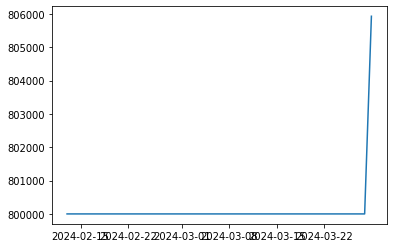

In [19]:
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])

In [124]:
result.orders;


In [180]:
result.metrics_df.iloc[32]

name       sharpe
value    0.240322
Name: 32, dtype: object

In [21]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,CHMF,2024-03-29,32,NaN,1865.50,29.85
2,buy,YNDX,2024-03-29,16,NaN,3994.10,31.95
3,buy,POSI,2024-03-29,35,NaN,2743.20,48.01
4,buy,SNGSP,2024-03-29,604,NaN,65.80,19.87
5,buy,WUSH,2024-03-29,346,NaN,324.04,56.06
6,buy,FIVE,2024-03-29,25,NaN,3002.25,37.53
7,buy,BANE,2024-03-29,15,NaN,3167.75,23.76
8,buy,NLMK,2024-03-29,192,NaN,220.79,21.20
9,buy,CIAN,2024-03-29,87,NaN,856.40,37.25


In [22]:
dfx = result.positions.tail(20)

In [364]:
dfx = dfx.reset_index()
dfx = dfx[['symbol', 'long_shares']]
dfx.columns = ['ticker', 'quantity']
dfx

,ticker,quantity
0,SELG,13
1,LSRG,4
2,OZON,1
3,SFIN,15
4,FIVE,1
5,ALRS,30
6,MOEX,2
7,RBCM,987
8,DELI,6
9,RTKM,49


In [365]:
def df_to_dict(dfx):
    return {row.ticker:row.quantity for _,row in dfx.iterrows()}

old_port = df_to_dict(df_port)
new_port = df_to_dict(dfx)
new_port

{'SELG': 13,
 'LSRG': 4,
 'OZON': 1,
 'SFIN': 15,
 'FIVE': 1,
 'ALRS': 30,
 'MOEX': 2,
 'RBCM': 987,
 'DELI': 6,
 'RTKM': 49,
 'CHMF': 1,
 'WUSH': 20,
 'ASTR': 6,
 'RNFT': 31,
 'SNGSP': 16,
 'NLMK': 6,
 'AFKS': 228,
 'RTKMP': 41,
 'POSI': 2,
 'CIAN': 4}

In [347]:
def calculate_portfolio_difference(old_portfolio, new_portfolio):
    """
    Рассчитать разницу между двумя портфелями.

    Args:
        old_portfolio: Словарь, где ключом является тикер, а значением - количество акций.
        new_portfolio: Словарь, где ключом является тикер, а значением - количество акций.

    Returns:
        Словарь, где ключом является тикер, а значением - разница между количеством акций в 
        новых и старых портфелях.
    """

    difference = {}
    for ticker in new_portfolio:
        if ticker in old_portfolio:
            difference[ticker] = new_portfolio[ticker] - old_portfolio[ticker]
        else:
            difference[ticker] = new_portfolio[ticker]

    for ticker in old_portfolio:
        if ticker not in new_portfolio:
            difference[ticker] = -old_portfolio[ticker]
    # Сортировка по значению, по возрастанию
    sorted_diff = sorted(difference.items(), key=lambda x: x[1])

    return sorted_diff

In [349]:
res = calculate_portfolio_difference(old_port, new_port)
res

[(None, -22757),
 ('SNGSP', -1034),
 ('MAGN', -740),
 ('NLMK', -310),
 ('SBER', -220),
 ('TATN', -107),
 ('TRNFP', -51),
 ('RU000A107RZ0', -40),
 ('ROSN', -37),
 ('SIBN', -27),
 ('BANEP', -14),
 ('LKOH', -10),
 ('CHMF', -9),
 ('BANE', 14),
 ('YNDX', 15),
 ('POSI', 22),
 ('OZON', 23),
 ('FIVE', 23),
 ('CIAN', 81),
 ('WUSH', 324),
 ('RTKM', 844)]

In [304]:
df_port

,figi,ticker,name,quantity,price
7,BBG004S686N0,BANEP,Башнефть - привилегированные акции,14,2255.000
12,BBG00475K6C3,CHMF,Северсталь,39,1876.800
0,BBG004731032,LKOH,ЛУКОЙЛ,10,7584.000
4,BBG004S68507,MAGN,Магнитогорский металлургический комбинат,740,56.425
1,BBG004S681B4,NLMK,НЛМК,490,221.280
10,TCS00A103X66,POSI,Positive Technologies,11,2768.600
13,BBG004731354,ROSN,Роснефть,37,567.000
2,TCS00A107RZ0,RU000A107RZ0,ГК Самолет выпуск 13,40,995.000
11,BBG004730N88,SBER,Сбер Банк,220,298.860
6,BBG004S684M6,SIBN,Газпром нефть,27,742.700


In [218]:
dfx = result.trades.copy()
dfx = dfx[['symbol', 'pnl']].groupby('symbol').sum()
dfx.sort_values('pnl')

,pnl
symbol,
NOMP,-13070.94
SPBE,-7581.30
QIWI,-5513.50
UNAC,-5339.80
KROT,-4924.00
MRKZ,-4625.38
NOMPP,-4282.85
BLNG,-2272.16
APTK,-1772.29


In [149]:
csv_data_source = CSVDataSource()
df = csv_data_source.query(['BANEP'], '14/12/2023', '4/1/2024')
df.head(10)

Loaded cached bar data.



D:\Soft\Anaconda\envs\t\Lib\site-packages\pybroker\common.py:227: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date).to_pydatetime()


,date,open,high,low,close,symbol
8618,2023-12-14,1618.0,1623.0,1560.0,1562.0,BANEP
8619,2023-12-15,1556.0,1655.0,1541.0,1654.0,BANEP
8620,2023-12-18,1665.0,1724.0,1665.0,1715.0,BANEP
8621,2023-12-19,1719.5,1729.5,1682.0,1703.5,BANEP
8622,2023-12-20,1703.5,1746.5,1703.5,1738.0,BANEP
8623,2023-12-21,1745.0,1745.0,1691.0,1714.5,BANEP
8624,2023-12-22,1715.0,1741.5,1715.0,1725.0,BANEP
8625,2023-12-25,1734.5,1748.5,1715.5,1722.0,BANEP
8626,2023-12-26,1721.0,1740.0,1706.0,1733.5,BANEP
8627,2023-12-27,1735.0,1775.0,1731.5,1748.0,BANEP


In [152]:
result.orders;

### Rotation Trade

In [154]:
import pybroker as pyb
from pybroker import ExecContext, Strategy, StrategyConfig

In [155]:
import talib as ta

roc_20 = pyb.indicator(
    'roc_20', lambda data: ta.ROC(data.close, timeperiod=20))

In [157]:
def rank(ctxs: dict[str, ExecContext]):
    scores = {
        symbol: ctx.indicator('roc_20')[-1]
        for symbol, ctx in ctxs.items()
    }
    sorted_scores = sorted(
        scores.items(),
        key=lambda score: score[1],
        reverse=True
    )
    threshold = pyb.param('rank_threshold')
    top_scores = sorted_scores[:threshold]
    top_symbols = [score[0] for score in top_scores]
    pyb.param('top_symbols', top_symbols)

In [158]:
def rotate(ctx: ExecContext):
    if ctx.long_pos():
        if ctx.symbol not in pyb.param('top_symbols'):
            ctx.sell_all_shares()
    else:
        target_size = pyb.param('target_size')
        ctx.buy_shares = ctx.calc_target_shares(target_size)
        ctx.score = ctx.indicator('roc_20')[-1]

In [164]:
config = StrategyConfig(max_long_positions = 10,
                       initial_cash = 1_000_000,)
pyb.param('target_size', 1 / config.max_long_positions)
pyb.param('rank_threshold', 5)

5

In [167]:
strategy = Strategy(csv_data_source, start_date='1/1/2023', end_date='4/3/2024', config = config)
strategy.set_before_exec(rank)
strategy.add_execution(rotate, opt_assets, indicators=roc_20)
result = strategy.backtest(warmup=20)

Backtesting: 2023-01-01 00:00:00 to 2024-04-03 00:00:00

Loaded cached bar data.

Computing indicators...


100% (156 of 156) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Test split: 2023-01-03 00:00:00 to 2024-03-29 00:00:00


100% (315 of 315) |######################| Elapsed Time: 0:00:04 Time:  0:00:040000



Finished backtest: 0:00:06


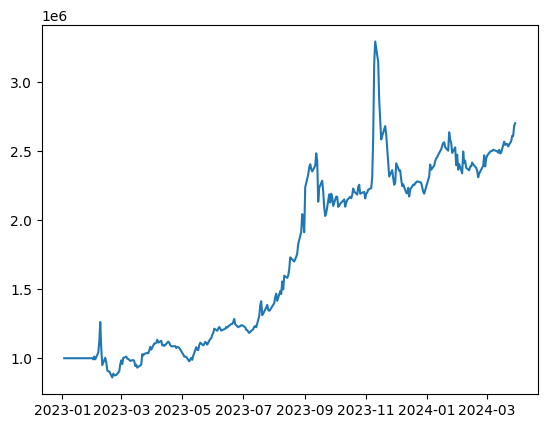

In [168]:
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])